In [68]:
import numpy as np
import pandas as pd
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
DATA_PATH = './csv_data/nocolorinfo'

train_df = pd.read_csv(DATA_PATH + '/train.csv')
val_df = pd.read_csv(DATA_PATH + '/val.csv')
test_df = pd.read_csv(DATA_PATH + '/test.csv')

In [69]:
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [70]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else :
        return num_samples // batch_size

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [72]:
model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [73]:
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white',
             'dress', 'shirt', 'pants', 'shorts', 'shoes']

## 모델에 이미지를 넣을 수 없으므로 제네레이터를 만듦.

In [74]:
# Make Generator
# 이미지 제네레이터를 정의합니다.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle = True,
    seed=42
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

test_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.
Found 2391 validated image filenames.


# 학습
> `train_generator`

In [75]:
# model.fit(train_generator,
#          validation_data = val_generator,
#          epochs = 10, verbose=0)
# test_datagen = ImageDataGenerator(rescale = 1./255)

In [76]:
model.save("p121.h5")

# 결과 가져오기

In [77]:
from tensorflow import keras

loaded_model = keras.models.load_model("p121.h5")


result = loaded_model.predict(test_generator)

# 테스트 데이터 예측

import matplotlib.pyplot as plt
import cv2  # pip install opencv-python

image = cv2.imread(test_df['image'][10])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

desc = zip(class_col,list(result[10]))
desc_list = list(desc);
type = desc_list[0:6];
color = desc_list[6:11];
type = sorted(type, key=lambda z:z[1], reverse=True)
color = sorted(color, key=lambda z:z[1], reverse=True)

In [78]:
print(type[0][0],type[0][1])
print(color[0][0], color[0][1])

white 0.5327686
shirt 0.71456015


In [79]:
# plt.title(type[0][0]);
# plt.show();

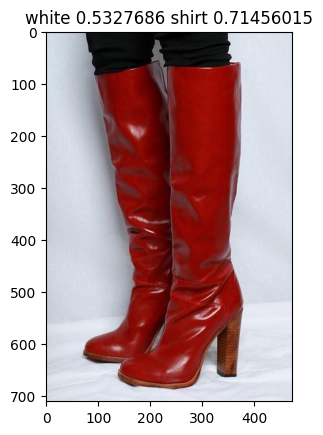

In [80]:
plt.title(type[0][0]+' '+str(type[0][1])+' '+color[0][0]+' '+str(color[0][1]));
plt.show();